## Web APIs

As revision from yesterday a we API is a contract between systems - if you send a request in a particular formatthen the API will respond in a known format.


In [3]:
# %load D:/Notebooks/extras/connection_information.txt
# dog API
dog_url = "https://dog.ceo/api/breeds/image/random"

# open weather map API
api_key = "d1741b0c4ca70aeb629424a1ddcf28a1"
openweather_url = "https://api.openweathermap.org/data/2.5/weather"
q = "{city_name},{country_code}"

# database connection

host = "training-db.pythoncharmers.com"
port = 5432
database = "training"
username = "trainee"
password = ''
connection_string = f"postgresql://{username}:{password}@{host}:{port}/{database}"


In [19]:
import requests

In [20]:
requests.get?

In [21]:
session =requests.Session()

In [24]:
session.proxies ={
    'http':'localhost:3128',
    'https':'localhost:3128'
}

In [25]:
session.get('https://www.tmr.qld.gov.au')

<Response [200]>

In [26]:
getParameters = {
    'appid':api_key,
    'q':"Brisbane"
}

In [27]:
session.get(openweather_url,params=getParameters)

<Response [200]>

In [29]:
response = session.get(openweather_url,params=getParameters)

In [30]:
response.headers['Content-Type']

'application/json; charset=utf-8'

In [35]:
response.json()

{'coord': {'lon': 153.02, 'lat': -27.47},
 'weather': [{'id': 521,
   'main': 'Rain',
   'description': 'shower rain',
   'icon': '09n'}],
 'base': 'stations',
 'main': {'temp': 294.59,
  'pressure': 1028,
  'humidity': 82,
  'temp_min': 292.04,
  'temp_max': 297.04},
 'visibility': 10000,
 'wind': {'speed': 5.1, 'deg': 100},
 'clouds': {'all': 75},
 'dt': 1569887073,
 'sys': {'type': 1,
  'id': 9485,
  'message': 0.0066,
  'country': 'AU',
  'sunrise': 1569871679,
  'sunset': 1569916055},
 'timezone': 36000,
 'id': 2174003,
 'name': 'Brisbane',
 'cod': 200}

{'coord': {'lon': 153.02, 'lat': -27.47},
 'weather': [{'id': 521,
   'main': 'Rain',
   'description': 'shower rain',
   'icon': '09n'}],
 'base': 'stations',
 'main': {'temp': 294.59,
  'pressure': 1028,
  'humidity': 82,
  'temp_min': 292.04,
  'temp_max': 297.04},
 'visibility': 10000,
 'wind': {'speed': 5.1, 'deg': 100},
 'clouds': {'all': 75},
 'dt': 1569887073,
 'sys': {'type': 1,
  'id': 9485,
  'message': 0.0066,
  'country': 'AU',
  'sunrise': 1569871679,
  'sunset': 1569916055},
 'timezone': 36000,
 'id': 2174003,
 'name': 'Brisbane',
 'cod': 200}

In [36]:
weather = response.json()

In [37]:
weather.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [40]:
weather['main']['temp']

294.59

In [42]:
getParameters['q'] = 'Melbourne'

In [43]:
response = session.get(openweather_url,params=getParameters)
weather = response.json()
weather['main']['temp']

286.32

## Exercise: Using a rest API

1. Pick the city you've been to thats furthes from Brisbane

In [47]:
getParameters['q'] = 'Apia'

In [50]:
response = session.get(openweather_url,params=getParameters)
weather = response.json()
weather['main']['temp']

25

In [69]:
getParameters['units'] = 'metric'

In [85]:
def getCityTemp(city, countryCode='AU'):
    """Use the OpenWeaatherMap API to get the 
    current temperature for a given city
    
    Examples:
    >getTemperture('Brisbane')
    >getTemperature ('London', ContryCode ='GB')"""
    
    getParameters['q']= city +' ,' + countryCode
    response = session.get(openweather_url,params=getParameters)
    weather = response.json()
    return weather['main']['temp']

In [86]:
getCityTemp('Perth', countryCode = 'AU')

16.24

In [99]:
cities = ['Brisbane','Melboure','Sydney','Perth','Hobart']

In [100]:
cities = ['Perth','Melbourne','Sydney']
cityTemp = {}
for cityName in cities:
    cityTemp[cityName] = getCityTemp(cityName)

## Working with tabular data in Python

In [101]:
import pandas as pd

In [102]:
%matplotlib inline

In [103]:
pd.read_csv('D:/Data/olympics2012.csv')

Country  Gold  Silver  Bronze
0                 Afghanistan     0       0       1
1                     Albania     0       0       0
2                     Algeria     1       0       0
3     American Virgin Islands     0       0       0
4                     Andorra     0       0       0
5                      Angola     0       0       0
6         Antigua and Barbuda     0       0       0
7                   Argentina     1       1       2
8                     Armenia     0       1       2
9                       Aruba     0       0       0
10                  Australia     7      16      12
11                    Austria     0       0       0
12                 Azerbaijan     2       2       6
13                    Bahamas     1       0       0
14                    Bahrain     0       0       1
15                 Bangladesh     0       0       0
16                   Barbados     0       0       0
17                    Belarus     2       5       5
18                    Belgium     0       1       2
19                     Belize     0       0       0
20                      Benin     0       0       0
21                    Bermuda     0       0       0
22                     Bhutan     0       0       0
23                    Bolivia     0       0       0
24     Bosnia and Herzegovina     0       0       0
25                   Botswana     0       1       0
26                     Brazil     3       5       9
27     British Virgin Islands     0       0       0
28          Brunei Darussalam     0       0       0
29                   Bulgaria     0       1       1
..                        ...   ...     ...     ...
174                     Sudan     0       0       0
175                  Suriname     0       0       0
176                 Swaziland     0       0       0
177                    Sweden     1       4       3
178               Switzerland     2       2       0
179                     Syria     0       0       0
180                 Taiwan(2)     0       1       1
181                Tajikistan     0       0       1
182                  Tanzania     0       0       0
183                  Thailand     0       2       1
184               Timor-Leste     0       0       0
185                      Togo     0       0       0
186                     Tonga     0       0       0
187       Trinidad and Tobago     1       0       3
188                   Tunisia     1       1       1
189                    Turkey     2       2       1
190              Turkmenistan     0       0       0
191                    Tuvalu     0       0       0
192                    Uganda     1       0       0
193                   Ukraine     6       5       9
194      United Arab Emirates     0       0       0
195  United States of America    46      29      29
196                   Uruguay     0       0       0
197                Uzbekistan     1       0       3
198                   Vanuatu     0       0       0
199                 Venezuela     1       0       0
200                  Viet Nam     0       0       0
201                     Yemen     0       0       0
202                    Zambia     0       0       0
203                  Zimbabwe     0       0       0

[204 rows x 4 columns]

In [106]:
%cd D:/Data

D:\Data


In [110]:
olympics=pd.read_csv('olympics2012.csv')

In [111]:
type(olympics)

pandas.core.frame.DataFrame

In [112]:
olympics.describe()

Gold      Silver      Bronze
count  204.000000  204.000000  204.000000
mean     1.480392    1.441176    1.745098
std      5.213152    4.145324    4.398133
min      0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000
50%      0.000000    0.000000    0.000000
75%      1.000000    1.000000    2.000000
max     46.000000   29.000000   32.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C552048>,
      dtype=object)

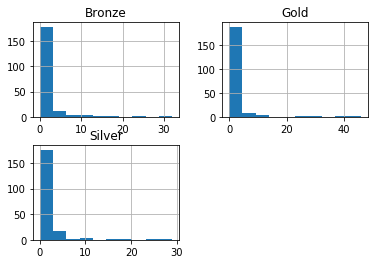

In [113]:
olympics.hist()

In [114]:
olympics=pd.read_csv('olympics2012.csv', index_col ='Country')

In [115]:
olympics.head()

Gold  Silver  Bronze
Country                                      
Afghanistan                 0       0       1
Albania                     0       0       0
Algeria                     1       0       0
American Virgin Islands     0       0       0
Andorra                     0       0       0

In [117]:
olympics.columns

Index(['Gold', 'Silver', 'Bronze'], dtype='object')

In [118]:
olympics.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Virgin Islands',
       'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba',
       ...
       'United Arab Emirates', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country', length=204)

In [119]:
olympics['Gold']

Country
Afghanistan                  0
Albania                      0
Algeria                      1
American Virgin Islands      0
Andorra                      0
Angola                       0
Antigua and Barbuda          0
Argentina                    1
Armenia                      0
Aruba                        0
Australia                    7
Austria                      0
Azerbaijan                   2
Bahamas                      1
Bahrain                      0
Bangladesh                   0
Barbados                     0
Belarus                      2
Belgium                      0
Belize                       0
Benin                        0
Bermuda                      0
Bhutan                       0
Bolivia                      0
Bosnia and Herzegovina       0
Botswana                     0
Brazil                       3
British Virgin Islands       0
Brunei Darussalam            0
Bulgaria                     0
                            ..
Sudan                        0


## Exercise: Calculating the toal number of medals won by each county

You know how to index out a column. What happens when you add the gold Colum to the silber column?

Create a total column by adding the gold, silver and Bronze comlumns together

In [120]:
olympics['total']= olympics['Gold']+olympics['Silver']+olympics['Bronze']

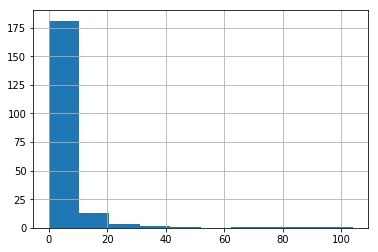

In [123]:
olympics['total'].hist()

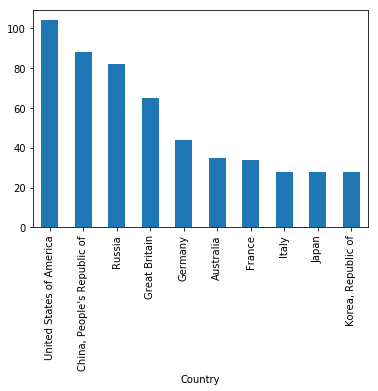

In [125]:
olympics['total'].nlargest(10).plot(kind='bar')

In [126]:
olympics.sample(5)

Gold  Silver  Bronze  total
Country                               
Japan         7       4      17     28
Thailand      0       2       1      3
Mauritius     0       0       0      0
Colombia      1       3       4      8
Kenya         2       4       5     11

In [127]:
population = pd.read_csv(
    'country_populations_by_year.csv',
    index_col ='Country Name')

In [129]:
population.sample(5)

Country Code     Indicator Name Indicator Code        1960  \
Country Name                                                              
Cabo Verde            CPV  Population, total    SP.POP.TOTL    202310.0   
Sri Lanka             LKA  Population, total    SP.POP.TOTL   9874481.0   
Singapore             SGP  Population, total    SP.POP.TOTL   1646400.0   
Germany               DEU  Population, total    SP.POP.TOTL  72814900.0   
Lithuania             LTU  Population, total    SP.POP.TOTL   2778550.0   

                    1961        1962        1963        1964        1965  \
Country Name                                                               
Cabo Verde      205956.0    210867.0    216908.0    223846.0    231428.0   
Sri Lanka     10111646.0  10352188.0  10597520.0  10849979.0  11110828.0   
Singapore      1702400.0   1750200.0   1795000.0   1841600.0   1886900.0   
Germany       73377632.0  74025784.0  74714353.0  75318337.0  75963695.0   
Lithuania      2823550.0   2863350.0   2898950.0   2935200.0   2971450.0   

                    1966  ...        2008        2009        2010        2011  \
Country Name              ...                                                   
Cabo Verde      239770.0  ...    491723.0    496963.0    502384.0    508067.0   
Sri Lanka     11380683.0  ...  19945832.0  20075086.0  20198353.0  20315017.0   
Singapore      1934400.0  ...   4839396.0   4987573.0   5076732.0   5183688.0   
Germany       76600311.0  ...  82110097.0  81902307.0  81776930.0  80274983.0   
Lithuania      3008050.0  ...   3198231.0   3162916.0   3097282.0   3028115.0   

                    2012        2013        2014        2015        2016  \
Country Name                                                               
Cabo Verde      513979.0    520106.0    526437.0    532913.0    539560.0   
Sri Lanka     20425000.0  20585000.0  20771000.0  20966000.0  21203000.0   
Singapore      5312437.0   5399162.0   5469724.0   5535002.0   5607283.0   
Germany       80425823.0  80645605.0  80982500.0  81686611.0  82348669.0   
Lithuania      2987773.0   2957689.0   2932367.0   2904910.0   2868231.0   

                    2017  
Country Name              
Cabo Verde      546388.0  
Sri Lanka     21444000.0  
Singapore      5612253.0  
Germany       82695000.0  
Lithuania      2827721.0  

[5 rows x 61 columns]

In [130]:
compCountryPopMedals = olympics['total']/population['2012']

In [133]:
compCountryPopMedals.nlargest(10)

Grenada                0.000009
Jamaica                0.000004
Trinidad and Tobago    0.000003
New Zealand            0.000003
Slovenia               0.000002
Georgia                0.000002
Mongolia               0.000002
Hungary                0.000002
Lithuania              0.000002
Montenegro             0.000002
dtype: float64

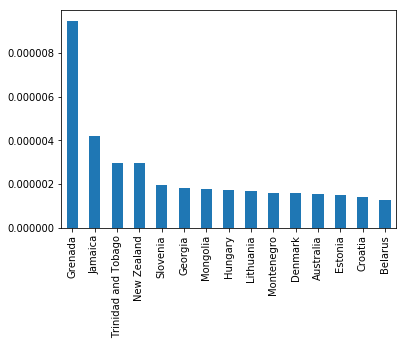

In [135]:
compCountryPopMedals.nlargest(15).plot(kind='bar')

In [136]:
len(compCountryPopMedals)

296

In [137]:
len(population)

264

In [141]:
len(olympics)

204

In [139]:
olympics['medalsPerPerson']= compCountryPopMedals

In [140]:
olympics

Gold  Silver  Bronze  total  medalsPerPerson
Country                                                               
Afghanistan                  0       0       1      1     3.257652e-08
Albania                      0       0       0      0     0.000000e+00
Algeria                      1       0       0      1     2.661992e-08
American Virgin Islands      0       0       0      0              NaN
Andorra                      0       0       0      0     0.000000e+00
Angola                       0       0       0      0     0.000000e+00
Antigua and Barbuda          0       0       0      0     0.000000e+00
Argentina                    1       1       2      4     9.501924e-08
Armenia                      0       1       2      3     1.040972e-06
Aruba                        0       0       0      0     0.000000e+00
Australia                    7      16      12     35     1.538971e-06
Austria                      0       0       0      0     0.000000e+00
Azerbaijan                   2       2       6     10     1.075756e-06
Bahamas                      1       0       0      1              NaN
Bahrain                      0       0       1      1     7.691024e-07
Bangladesh                   0       0       0      0     0.000000e+00
Barbados                     0       0       0      0     0.000000e+00
Belarus                      2       5       5     12     1.267896e-06
Belgium                      0       1       2      3     2.695843e-07
Belize                       0       0       0      0     0.000000e+00
Benin                        0       0       0      0     0.000000e+00
Bermuda                      0       0       0      0     0.000000e+00
Bhutan                       0       0       0      0     0.000000e+00
Bolivia                      0       0       0      0     0.000000e+00
Bosnia and Herzegovina       0       0       0      0     0.000000e+00
Botswana                     0       1       0      1     4.786258e-07
Brazil                       3       5       9     17     8.476225e-08
British Virgin Islands       0       0       0      0     0.000000e+00
Brunei Darussalam            0       0       0      0     0.000000e+00
Bulgaria                     0       1       1      2     2.737518e-07
...                        ...     ...     ...    ...              ...
Sudan                        0       0       0      0     0.000000e+00
Suriname                     0       0       0      0     0.000000e+00
Swaziland                    0       0       0      0     0.000000e+00
Sweden                       1       4       3      8     8.403914e-07
Switzerland                  2       2       0      4     5.001963e-07
Syria                        0       0       0      0              NaN
Taiwan(2)                    0       1       1      2              NaN
Tajikistan                   0       0       1      1     1.250772e-07
Tanzania                     0       0       0      0     0.000000e+00
Thailand                     0       2       1      3     4.421910e-08
Timor-Leste                  0       0       0      0     0.000000e+00
Togo                         0       0       0      0     0.000000e+00
Tonga                        0       0       0      0     0.000000e+00
Trinidad and Tobago          1       0       3      4     2.981541e-06
Tunisia                      1       1       1      3     2.755664e-07
Turkey                       2       2       1      5     6.705121e-08
Turkmenistan                 0       0       0      0     0.000000e+00
Tuvalu                       0       0       0      0     0.000000e+00
Uganda                       1       0       0      1     2.754305e-08
Ukraine                      6       5       9     20     4.386609e-07
United Arab Emirates         0       0       0      0     0.000000e+00
United States of America    46      29      29    104              NaN
Uruguay                      0       0       0      0     0.000000e+00
Uzbekistan                   1       0       3    

## Tip

Matching inddexs can be quite hard.  If you cant do this manual there are tools that will help i.e scoring strings metrics using the "jellyfish" library.

In [145]:
olympics.index.difference(population.index)

Index(['American Virgin Islands', 'Bahamas', 'Burma (Myanmar)', 'Cape Verde',
       'China, People's Republic of', 'Congo',
       'Congo, the Democratic Republic of the', 'Cook Islands', 'DPR Korea',
       'Egypt', 'Former Yugoslav Republic of Macedonia', 'Gambia',
       'Gaza Strip/Palestine/West Bank', 'Great Britain', 'Hong Kong', 'Iran',
       'Korea, Republic of', 'Kyrgyzstan', 'Laos', 'Micronesia', 'Russia',
       'Samoa, American', 'Slovakia', 'St Kitts and Nevis', 'St Lucia',
       'St Vincent and the Grenadines', 'Syria', 'Taiwan(2)',
       'United States of America', 'Venezuela', 'Viet Nam', 'Yemen'],
      dtype='object')

In [146]:
population.index.difference(olympics.index)

Index(['American Samoa', 'Arab World', 'Bahamas, The', 'Cabo Verde',
       'Caribbean small states', 'Central Europe and the Baltics',
       'Channel Islands', 'China', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Curacao', 'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD countries)',
       'East Asia & Pacific (excluding high income)', 'Egypt, Arab Rep.',
       'Euro area', 'Europe & Central Asia',
       'Europe & Central Asia (IDA & IBRD countries)',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Faroe Islands', 'Fragile and conflict affected situations',
       'French Polynesia', 'Gambia, The', 'Gibraltar', 'Greenland',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Hong Kong SAR, China', 'IBRD only', 'IDA & IBRD total', 'IDA blend',
       'IDA only', 'IDA total', 'Iran, Islamic Rep.', 'Isle of Man',
       'Korea, Dem. People’s Rep.', 'Korea, Rep.', 'Kosovo', 'Kyrgyz Republi

At some point youll need a mapping of one value to another value. this is a python dictionary

In [147]:
countryNameMapping = {
    'Viet Nam' : 'Vietnam',
    'United States of America' : 'United States'
}

In [149]:
olympics=olympics.rename(index=countryNameMapping)

In [150]:
%cd T:\Python Training\

T:\Python Training


In [151]:
pd.read_excel('training_data_Mobile_Phone_offences.xlsx')

Infringement notices and charged offences issued to 305 CRNs (Double Demerit Point Mobile Phone offence recipients in 2018) from 01/01/2008 to 30/06/2019  \
0                                             Unique_Id                                                                                                          
1                                                 10001                                                                                                          
2                                                 10001                                                                                                          
3                                                 10001                                                                                                          
4                                                 10001                                                                                                          
5                                                 10001                                                                                                          
6                                                 10001                                                                                                          
7                                                 10001                                                                                                          
8                                                 10001                                                                                                          
9                                                 10001                                                                                                          
10                                                10001                                                                                                          
11                                                10001                                                                                                          
12                                                10001                                                                                                          
13                                                10001                                                                                                          
14                                                10002                                                                                                          
15                                                10002                                                                                                          
16                                                10002                                                                                                          
17                                                10002                                                                                                          
18                                                10002                                                                                                          
19                                                10002                                                                                                          
20                                                10002                                                                                                          
21                                                10002                                                                                                          
22                                                10002                                                                                                          
23                                                10002                                                              

### Reading the mobile phone offences so its more usable

1. Take a look at the hlep for `pd.read_excel` - there is a lot of optional keyword arguments.
2. Using the help (skip the first row of data) 
3. Set the object_id as indexs column `

In [158]:
mobile = pd.read_excel('training_data_Mobile_Phone_offences.xlsx',
skiprows=1,
skipfooter=1,
index_col = 'Unique_Id',
parse_dates = ['Offence Date']
)

In [159]:
len(mobile)

5275

mobile.dtypes

In [160]:
mobile.dtypes

Offence Date             datetime64[ns]
QT Offence ID                     int64
Offence Code                     object
Offence Description              object
Type - Category 1                object
Latest Offence Status            object
dtype: object

### Reading data from an SQL databases, and writing Excel

In gerenal if the database is on your network the proxy won't be an issue.
Our training databses is not, so wel be reading from an sQLite database instead.

Pandas when it's reading from a database isn't doing the heavy lifting. Instead Pandas uses SQLAlchemy is designed to give Python a common interface to any database.

In pandas to read from the database the only things you require are the table/sql query and the "connection string". If  your connecto to a dabase check the cconnection string details by reading the SQL Alchemy docs - search SQL alchemy Engine COnfiguaration


In [162]:
%cd D:/Data

D:\Data


In [163]:
connectionString = 'sqlite:///' + 'places.sqlite'

In [168]:
pd.read_sql_table('moz_places', connectionString, index_col='id')

url  \
id                                                       
1       https://www.mozilla.org/en-US/firefox/central/   
8                   place:type=6&sort=14&maxResults=10   
9                              http://qwantjunior.com/   
10                            https://qwantjunior.com/   
11                        https://www.qwantjunior.com/   
12                                 place:type=3&sort=4   
13                           place:transition=7&sort=4   
14                                 place:type=6&sort=1   
15                                place:folder=TOOLBAR   
16                         place:folder=BOOKMARKS_MENU   
17                      place:folder=UNFILED_BOOKMARKS   
18         http://pagesperso-orange.fr/patrick.straub/   
19                      http://www.panoramadelart.com/   
20   http://www.rmn.fr/francais/jeune-public-6/joue...   
21       http://www.mccord-museum.qc.ca/fr/clefs/jeux/   
22   http://crdp.ac-amiens.fr/cddpoise/blog_mediath...   
23                  http://www.monet2010.com/fr#/home/   
24   http://www.culture.gouv.fr/documentation/jocon...   
25                    http://artsvisuelsecole.free.fr/   
26               http://chdecole.ch/wordpress/page/93/   
27                       http://www.hugolescargot.com/   
28   http://www.ac-grenoble.fr/ien.g2/spip.php?arti...   
29                         http://www.lesdomosores.fr/   
30   http://www.eren.lautre.net/portesdelaforet/jeu...   
31   http://media.eduscol.education.fr/file/APER/82...   
32   http://monecole.fr/top/education-civique-appre...   
33   http://eduscol.education.fr/education-securite...   
34   http://www.eren.lautre.net/portesdelaforet/jeu...   
35   http://pascal.locuty.pagesperso-orange.fr/aper...   
36                             http://www.uptoten.com/   
..                                                 ...   
301  http://image-cnes.fr/?s=pleiades+1b&submit.x=2...   
302  http://www.cndp.fr/evolution-des-especes/accue...   
303                             http://44.svt.free.fr/   
304  http://www.snv.jussieu.fr/bmedia/Fruits/index.htm   
305       http://www.biologieenflash.net/sommaire.html   
306  http://www.animation-muscle.afm-france.org/non...   
307  http://www.universcience.fr/fr/juniors/contenu...   
308     http://www.monoceanetmoi.com/web/index.php/fr/   
309    http://www.espace-sciences.org/juniors/rubrique   
310   http://www.evolution-of-life.com/fr/accueil.html   
311  http://education.francetv.fr/activite-interact...   
312  http://www.discip.ac-caen.fr/phch/college/quat...   
313  http://www.etab.ac-caen.fr/apiedu/didamat/inde...   
314   http://jeux.lulu.pagesperso-orange.fr//index.htm   
315  http://portail.csdecou.qc.ca/portailftp/portai...   
316  http://pole-maternelle-28.tice.ac-orleans-tour...   
317  http://www.crdp-strasbourg.fr/maternelle/accue...   
318                         http://materalbum.free.fr/   
319                               http://jt44.free.fr/   
320               http://yvan.raymond.pedagog.free.fr/   
321                   http://www.fiche-maternelle.com/   
322                              http://www.google.fr/   
323               http://alacasecatherine.fr/index.htm   
324       http://www.webinstit.net/lecture/lecture.htm   
325               http://www.jlsigrist.com/sitenombre/   
326                           http://forum.primtux.fr/   
327         https://www.mozilla.org/en-US/firefox/new/   
328  https://addons.mozilla.org/fr/firefox/search-e...   
329  https://addons.mozilla.org/fr/firefox/search/?...   
330  https://addons.mozilla.org/fr/firefox/search/?...   

                                             title  \
id                                                   
1                                             None   
8                                             None   
9                                             None   
10                                            None   
11                                    Qwant Junior   
12                

In [169]:
sql = """
Select * from sqlite_master where type = 'table'
"""

In [170]:
pd.read_sql_query(
sql, connectionString
)

type                 name             tbl_name  rootpage  \
0   table           moz_places           moz_places         2   
1   table    moz_historyvisits    moz_historyvisits         3   
2   table     moz_inputhistory     moz_inputhistory         4   
3   table            moz_hosts            moz_hosts         6   
4   table        moz_bookmarks        moz_bookmarks         8   
5   table  moz_bookmarks_roots  moz_bookmarks_roots         9   
6   table         moz_keywords         moz_keywords        11   
7   table      sqlite_sequence      sqlite_sequence        13   
8   table         moz_favicons         moz_favicons        14   
9   table  moz_anno_attributes  moz_anno_attributes        16   
10  table            moz_annos            moz_annos        18   
11  table      moz_items_annos      moz_items_annos        19   
12  table         sqlite_stat1         sqlite_stat1        20   
13  table             newtable             newtable        37   

                                                  sql  
0   CREATE TABLE moz_places (   id INTEGER PRIMARY...  
1   CREATE TABLE moz_historyvisits (  id INTEGER P...  
2   CREATE TABLE moz_inputhistory (  place_id INTE...  
3   CREATE TABLE moz_hosts (  id INTEGER PRIMARY K...  
4   CREATE TABLE moz_bookmarks (  id INTEGER PRIMA...  
5   CREATE TABLE moz_bookmarks_roots (  root_name ...  
6   CREATE TABLE moz_keywords (  id INTEGER PRIMAR...  
7              CREATE TABLE sqlite_sequence(name,seq)  
8   CREATE TABLE moz_favicons (  id INTEGER PRIMAR...  
9   CREATE TABLE moz_anno_attributes (  id INTEGER...  
10  CREATE TABLE moz_annos (  id INTEGER PRIMARY K...  
11  CREATE TABLE moz_items_annos (  id INTEGER PRI...  
12            CREATE TABLE sqlite_stat1(tbl,idx,stat)  
13  CREATE TABLE newtable (\n\t"index" BIGINT, \n\...

### Exercise: how many sites did this user visit more than 1000 times?

1. Write an sql query to select all the data from `moz_places`
`where frequency >= 1000` and use the python `len` command to find the number of rows in the table.
2. Update your query so instead of selecting all rows,  `select count(*) from ....

In [171]:
sql = """
select * from moz_places where frecency >= 1000
"""

In [175]:
%%timeit
len(pd.read_sql_query(
sql, connectionString
))

45.8 ms ± 908 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [176]:
sql = """
select count(*) from moz_places where frecency >= 1000
"""

In [177]:
%%timeit
pd.read_sql_query(
sql, connectionString
)

43.2 ms ± 3.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Wrinting back to Excel

In [179]:
olympics.to_excel('London2012.xlsx')

In [180]:
population.to_excel('London2012.xlsx',sheet_name='population')

In [181]:
writer = pd.ExcelWriter('London2012.xlsx')
olympics.to_excel(writer, sheet_name = 'olympics')

In [182]:
writer.save()
writer.close()

### Exercise

In [184]:
sql = """
select * from moz_places 
"""

In [190]:
writer = pd.ExcelWriter('internet_history.xlsx')

In [206]:
moz_places = pd.read_sql_query('select * from moz_places', connectionString)
moz_bookmarks = pd.read_sql_query('select * from moz_bookmarks', connectionString)

In [210]:
moz_places.to_excel(writer, sheet_name = 'moz_places')
moz_bookmarks.to_excel(writer, sheet_name = 'moz_bookmarks')

In [211]:
writer.save()
writer.close()

### Selecting and filter data in Pandas

In [199]:
cars = pd.read_csv('Auto.csv', index_col=0)
cars.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
1  18.0          8         307.0         130    3504          12.0    70   
2  15.0          8         350.0         165    3693          11.5    70   
3  18.0          8         318.0         150    3436          11.0    70   
4  16.0          8         304.0         150    3433          12.0    70   
5  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
1       1  chevrolet chevelle malibu  
2       1          buick skylark 320  
3       1         plymouth satellite  
4       1              amc rebel sst  
5       1                ford torino

In [203]:
cars.set_index('name')

mpg  cylinders  displacement  horsepower  \
name                                                                           
chevrolet chevelle malibu          18.0          8         307.0         130   
buick skylark 320                  15.0          8         350.0         165   
plymouth satellite                 18.0          8         318.0         150   
amc rebel sst                      16.0          8         304.0         150   
ford torino                        17.0          8         302.0         140   
ford galaxie 500                   15.0          8         429.0         198   
chevrolet impala                   14.0          8         454.0         220   
plymouth fury iii                  14.0          8         440.0         215   
pontiac catalina                   14.0          8         455.0         225   
amc ambassador dpl                 15.0          8         390.0         190   
dodge challenger se                15.0          8         383.0         170   
plymouth 'cuda 340                 14.0          8         340.0         160   
chevrolet monte carlo              15.0          8         400.0         150   
buick estate wagon (sw)            14.0          8         455.0         225   
toyota corona mark ii              24.0          4         113.0          95   
plymouth duster                    22.0          6         198.0          95   
amc hornet                         18.0          6         199.0          97   
ford maverick                      21.0          6         200.0          85   
datsun pl510                       27.0          4          97.0          88   
volkswagen 1131 deluxe sedan       26.0          4          97.0          46   
peugeot 504                        25.0          4         110.0          87   
audi 100 ls                        24.0          4         107.0          90   
saab 99e                           25.0          4         104.0          95   
bmw 2002                           26.0          4         121.0         113   
amc gremlin                        21.0          6         199.0          90   
ford f250                          10.0          8         360.0         215   
chevy c20                          10.0          8         307.0         200   
dodge d200                         11.0          8         318.0         210   
hi 1200d                            9.0          8         304.0         193   
datsun pl510                       27.0          4          97.0          88   
...                                 ...        ...           ...         ...   
chevrolet cavalier                 28.0          4         112.0          88   
chevrolet cavalier wagon           27.0          4         112.0          88   
chevrolet cavalier 2-door          34.0          4         112.0          88   
pontiac j2000 se hatchback         31.0          4         112.0          85   
dodge aries se                     29.0          4         135.0          84   
pontiac phoenix                    27.0          4         151.0          90   
ford fairmont futura               24.0          4         140.0          92   
volkswagen rabbit l                36.0          4         105.0          74   
mazda glc custom l                 37.0          4          91.0          68   
mazda glc custom                   31.0          4          91.0          68   
plymouth horizon miser             38.0          4         105.0          63   
mercury lynx l                     36.0          4          98.0          70   
nissan stanza xe                   36.0          4         120.0          88   
honda accord                       36.0          4         107.0          75   
toyota corolla                     34.0          4         108.0          70   
honda civic                        38.0          4          91.0          67   
honda civic (auto)                 32.0          4          91.0          67   
datsun 310 gx                      3

In [207]:
cars.sample

<bound method NDFrame.sample of       mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
1    18.0          8         307.0         130    3504          12.0    70   
2    15.0          8         350.0         165    3693          11.5    70   
3    18.0          8         318.0         150    3436          11.0    70   
4    16.0          8         304.0         150    3433          12.0    70   
5    17.0          8         302.0         140    3449          10.5    70   
6    15.0          8         429.0         198    4341          10.0    70   
7    14.0          8         454.0         220    4354           9.0    70   
8    14.0          8         440.0         215    4312           8.5    70   
9    14.0          8         455.0         225    4425          10.0    70   
10   15.0          8         390.0         190    3850           8.5    70   
11   15.0          8         383.0         170    3563          10.0    70   
12   14.0          8         340

In [208]:
cars.set_index('origin')

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
origin                                                                          
1       18.0          8         307.0         130    3504          12.0    70   
1       15.0          8         350.0         165    3693          11.5    70   
1       18.0          8         318.0         150    3436          11.0    70   
1       16.0          8         304.0         150    3433          12.0    70   
1       17.0          8         302.0         140    3449          10.5    70   
1       15.0          8         429.0         198    4341          10.0    70   
1       14.0          8         454.0         220    4354           9.0    70   
1       14.0          8         440.0         215    4312           8.5    70   
1       14.0          8         455.0         225    4425          10.0    70   
1       15.0          8         390.0         190    3850           8.5    70   
1       15.0          8         383.0         170    3563          10.0    70   
1       14.0          8         340.0         160    3609           8.0    70   
1       15.0          8         400.0         150    3761           9.5    70   
1       14.0          8         455.0         225    3086          10.0    70   
3       24.0          4         113.0          95    2372          15.0    70   
1       22.0          6         198.0          95    2833          15.5    70   
1       18.0          6         199.0          97    2774          15.5    70   
1       21.0          6         200.0          85    2587          16.0    70   
3       27.0          4          97.0          88    2130          14.5    70   
2       26.0          4          97.0          46    1835          20.5    70   
2       25.0          4         110.0          87    2672          17.5    70   
2       24.0          4         107.0          90    2430          14.5    70   
2       25.0          4         104.0          95    2375          17.5    70   
2       26.0          4         121.0         113    2234          12.5    70   
1       21.0          6         199.0          90    2648          15.0    70   
1       10.0          8         360.0         215    4615          14.0    70   
1       10.0          8         307.0         200    4376          15.0    70   
1       11.0          8         318.0         210    4382          13.5    70   
1        9.0          8         304.0         193    4732          18.5    70   
3       27.0          4          97.0          88    2130          14.5    71   
...      ...        ...           ...         ...     ...           ...   ...   
1       28.0          4         112.0          88    2605          19.6    82   
1       27.0          4         112.0          88    2640          18.6    82   
1       34.0          4         112.0          88    2395          18.0    82   
1       31.0          4         112.0          85    2575          16.2    82   
1       29.0          4         135.0          84    2525          16.0    82   
1       27.0          4         151.0          90    2735          18.0    82   
1       24.0          4         140.0          92    2865          16.4    82   
2       36.0          4         105.0          74    1980          15.3    82   
3       37.0          4          91.0          68    2025          18.2    82   
3       31.0          4          91.0          68    1970          17.6    82   
1       38.0          4         105.0          63    2125          14.7    82   
1       36.0          4          98.0          70    2125          17.3    82   
3       36.0          4         120.0          88    2160          14.5    82   
3       36.0          4         107.0          75    2205          14.5    82   
3       34.0          4         108.0          70    2245          16.9    82   
3       38.0          4          91.0          67    1965          15.0    82   
3       32.0          4          91.0   

In [212]:
cars.reset_index()

index   mpg  cylinders  displacement  horsepower  weight  acceleration  \
0        1  18.0          8         307.0         130    3504          12.0   
1        2  15.0          8         350.0         165    3693          11.5   
2        3  18.0          8         318.0         150    3436          11.0   
3        4  16.0          8         304.0         150    3433          12.0   
4        5  17.0          8         302.0         140    3449          10.5   
5        6  15.0          8         429.0         198    4341          10.0   
6        7  14.0          8         454.0         220    4354           9.0   
7        8  14.0          8         440.0         215    4312           8.5   
8        9  14.0          8         455.0         225    4425          10.0   
9       10  15.0          8         390.0         190    3850           8.5   
10      11  15.0          8         383.0         170    3563          10.0   
11      12  14.0          8         340.0         160    3609           8.0   
12      13  15.0          8         400.0         150    3761           9.5   
13      14  14.0          8         455.0         225    3086          10.0   
14      15  24.0          4         113.0          95    2372          15.0   
15      16  22.0          6         198.0          95    2833          15.5   
16      17  18.0          6         199.0          97    2774          15.5   
17      18  21.0          6         200.0          85    2587          16.0   
18      19  27.0          4          97.0          88    2130          14.5   
19      20  26.0          4          97.0          46    1835          20.5   
20      21  25.0          4         110.0          87    2672          17.5   
21      22  24.0          4         107.0          90    2430          14.5   
22      23  25.0          4         104.0          95    2375          17.5   
23      24  26.0          4         121.0         113    2234          12.5   
24      25  21.0          6         199.0          90    2648          15.0   
25      26  10.0          8         360.0         215    4615          14.0   
26      27  10.0          8         307.0         200    4376          15.0   
27      28  11.0          8         318.0         210    4382          13.5   
28      29   9.0          8         304.0         193    4732          18.5   
29      30  27.0          4          97.0          88    2130          14.5   
..     ...   ...        ...           ...         ...     ...           ...   
362    368  28.0          4         112.0          88    2605          19.6   
363    369  27.0          4         112.0          88    2640          18.6   
364    370  34.0          4         112.0          88    2395          18.0   
365    371  31.0          4         112.0          85    2575          16.2   
366    372  29.0          4         135.0          84    2525          16.0   
367    373  27.0          4         151.0          90    2735          18.0   
368    374  24.0          4         140.0          92    2865          16.4   
369    375  36.0          4         105.0          74    1980          15.3   
370    376  37.0          4          91.0          68    2025          18.2   
371    377  31.0          4          91.0          68    1970          17.6   
372    378  38.0          4         105.0          63    2125          14.7   
373    379  36.0          4          98.0          70    2125          17.3   
374    380  36.0          4         120.0          88    2160          14.5   
375    381  36.0          4         107.0          75    2205          14.5   
376    382  34.0          4         108.0          70    2245          16.9   
377    383  38.0          4          91.0          67    1965          15.0   
378    384  32.0          4          91.0          67    1965          15.7   
379    385  38.0          4          91.0          67    1995          16.2   
380    386  25.0          6         181.0         110  

In [232]:
cars.reset_index().set_index('origin')
cars.set_index('name')

mpg  cylinders  displacement  horsepower  \
name                                                                           
chevrolet chevelle malibu          18.0          8         307.0         130   
buick skylark 320                  15.0          8         350.0         165   
plymouth satellite                 18.0          8         318.0         150   
amc rebel sst                      16.0          8         304.0         150   
ford torino                        17.0          8         302.0         140   
ford galaxie 500                   15.0          8         429.0         198   
chevrolet impala                   14.0          8         454.0         220   
plymouth fury iii                  14.0          8         440.0         215   
pontiac catalina                   14.0          8         455.0         225   
amc ambassador dpl                 15.0          8         390.0         190   
dodge challenger se                15.0          8         383.0         170   
plymouth 'cuda 340                 14.0          8         340.0         160   
chevrolet monte carlo              15.0          8         400.0         150   
buick estate wagon (sw)            14.0          8         455.0         225   
toyota corona mark ii              24.0          4         113.0          95   
plymouth duster                    22.0          6         198.0          95   
amc hornet                         18.0          6         199.0          97   
ford maverick                      21.0          6         200.0          85   
datsun pl510                       27.0          4          97.0          88   
volkswagen 1131 deluxe sedan       26.0          4          97.0          46   
peugeot 504                        25.0          4         110.0          87   
audi 100 ls                        24.0          4         107.0          90   
saab 99e                           25.0          4         104.0          95   
bmw 2002                           26.0          4         121.0         113   
amc gremlin                        21.0          6         199.0          90   
ford f250                          10.0          8         360.0         215   
chevy c20                          10.0          8         307.0         200   
dodge d200                         11.0          8         318.0         210   
hi 1200d                            9.0          8         304.0         193   
datsun pl510                       27.0          4          97.0          88   
...                                 ...        ...           ...         ...   
chevrolet cavalier                 28.0          4         112.0          88   
chevrolet cavalier wagon           27.0          4         112.0          88   
chevrolet cavalier 2-door          34.0          4         112.0          88   
pontiac j2000 se hatchback         31.0          4         112.0          85   
dodge aries se                     29.0          4         135.0          84   
pontiac phoenix                    27.0          4         151.0          90   
ford fairmont futura               24.0          4         140.0          92   
volkswagen rabbit l                36.0          4         105.0          74   
mazda glc custom l                 37.0          4          91.0          68   
mazda glc custom                   31.0          4          91.0          68   
plymouth horizon miser             38.0          4         105.0          63   
mercury lynx l                     36.0          4          98.0          70   
nissan stanza xe                   36.0          4         120.0          88   
honda accord                       36.0          4         107.0          75   
toyota corolla                     34.0          4         108.0          70   
honda civic                        38.0          4          91.0          67   
honda civic (auto)                 32.0          4          91.0          67   
datsun 310 gx                      3

Chaing indexes is easy and it make it much easier to select and filter data.

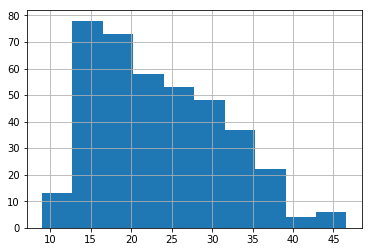

In [215]:
cars['mpg'].hist()

In [216]:
colOfInterest = ['mpg','acceleration','weight']
cars[colOfInterest]

mpg  acceleration  weight
1    18.0          12.0    3504
2    15.0          11.5    3693
3    18.0          11.0    3436
4    16.0          12.0    3433
5    17.0          10.5    3449
6    15.0          10.0    4341
7    14.0           9.0    4354
8    14.0           8.5    4312
9    14.0          10.0    4425
10   15.0           8.5    3850
11   15.0          10.0    3563
12   14.0           8.0    3609
13   15.0           9.5    3761
14   14.0          10.0    3086
15   24.0          15.0    2372
16   22.0          15.5    2833
17   18.0          15.5    2774
18   21.0          16.0    2587
19   27.0          14.5    2130
20   26.0          20.5    1835
21   25.0          17.5    2672
22   24.0          14.5    2430
23   25.0          17.5    2375
24   26.0          12.5    2234
25   21.0          15.0    2648
26   10.0          14.0    4615
27   10.0          15.0    4376
28   11.0          13.5    4382
29    9.0          18.5    4732
30   27.0          14.5    2130
..    ...           ...     ...
368  28.0          19.6    2605
369  27.0          18.6    2640
370  34.0          18.0    2395
371  31.0          16.2    2575
372  29.0          16.0    2525
373  27.0          18.0    2735
374  24.0          16.4    2865
375  36.0          15.3    1980
376  37.0          18.2    2025
377  31.0          17.6    1970
378  38.0          14.7    2125
379  36.0          17.3    2125
380  36.0          14.5    2160
381  36.0          14.5    2205
382  34.0          16.9    2245
383  38.0          15.0    1965
384  32.0          15.7    1965
385  38.0          16.2    1995
386  25.0          16.4    2945
387  38.0          17.0    3015
388  26.0          14.5    2585
389  22.0          14.7    2835
390  32.0          13.9    2665
391  36.0          13.0    2370
392  27.0          17.3    2950
393  27.0          15.6    2790
394  44.0          24.6    2130
395  32.0          11.6    2295
396  28.0          18.6    2625
397  31.0          19.4    2720

[392 rows x 3 columns]

In [233]:
cars.filter(like = 'honda', axis = 'index')

Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin, name]
Index: []

In [226]:
cars['ford_torino']

KeyError: 'ford_torino'

In [236]:
mask = cars['cylinders'] >=6
cars.loc[mask]

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
1    18.0          8         307.0         130    3504          12.0    70   
2    15.0          8         350.0         165    3693          11.5    70   
3    18.0          8         318.0         150    3436          11.0    70   
4    16.0          8         304.0         150    3433          12.0    70   
5    17.0          8         302.0         140    3449          10.5    70   
6    15.0          8         429.0         198    4341          10.0    70   
7    14.0          8         454.0         220    4354           9.0    70   
8    14.0          8         440.0         215    4312           8.5    70   
9    14.0          8         455.0         225    4425          10.0    70   
10   15.0          8         390.0         190    3850           8.5    70   
11   15.0          8         383.0         170    3563          10.0    70   
12   14.0          8         340.0         160    3609           8.0    70   
13   15.0          8         400.0         150    3761           9.5    70   
14   14.0          8         455.0         225    3086          10.0    70   
16   22.0          6         198.0          95    2833          15.5    70   
17   18.0          6         199.0          97    2774          15.5    70   
18   21.0          6         200.0          85    2587          16.0    70   
25   21.0          6         199.0          90    2648          15.0    70   
26   10.0          8         360.0         215    4615          14.0    70   
27   10.0          8         307.0         200    4376          15.0    70   
28   11.0          8         318.0         210    4382          13.5    70   
29    9.0          8         304.0         193    4732          18.5    70   
34   19.0          6         232.0         100    2634          13.0    71   
35   16.0          6         225.0         105    3439          15.5    71   
36   17.0          6         250.0         100    3329          15.5    71   
37   19.0          6         250.0          88    3302          15.5    71   
38   18.0          6         232.0         100    3288          15.5    71   
39   14.0          8         350.0         165    4209          12.0    71   
40   14.0          8         400.0         175    4464          11.5    71   
41   14.0          8         351.0         153    4154          13.5    71   
..    ...        ...           ...         ...     ...           ...   ...   
278  16.2          6         163.0         133    3410          15.8    78   
281  21.5          6         231.0         115    3245          15.4    79   
282  19.8          6         200.0          85    2990          18.2    79   
284  20.2          6         232.0          90    3265          18.2    79   
285  20.6          6         225.0         110    3360          16.6    79   
286  17.0          8         305.0         130    3840          15.4    79   
287  17.6          8         302.0         129    3725          13.4    79   
288  16.5          8         351.0         138    3955          13.2    79   
289  18.2          8         318.0         135    3830          15.2    79   
290  16.9          8         350.0         155    4360          14.9    79   
291  15.5          8         351.0         142    4054          14.3    79   
292  19.2          8         267.0         125    3605          15.0    79   
293  18.5          8         360.0         150    3940          13.0    79   
299  23.0          8         350.0         125    3900          17.4    79   
301  23.9          8         260.0          90    3420          22.2    79   
307  28.8          6         173.0         115    2595          11.3    79   
308  26.8          6         173.0         115    2700          12.9    79   
317  19.1          6         225.0          90    3381          18.7    80   
334  32.7          6         168.0         132    2910          11.4    80   
342  23.5          6        

In [237]:
maskOrigin = cars['origin'] ==2
mask = maskOrigin

### Exercise: How many cars don't have 4 ,6 or 8 cylinders?

create three boolean mask for the numbers of cylinders and combine them with the "Or"
operation - this uses the vertical bay - |

In [239]:
mask1 = cars['cylinders'] == 4
mask2 = cars['cylinders'] == 6
mask3 = cars['cylinders'] == 8

In [255]:
mask = (mask1 | mask2 | mask3)

In [256]:
cars.loc[~mask]

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
72   19.0          3          70.0          97    2330          13.5    72   
112  18.0          3          70.0          90    2124          13.5    73   
244  21.5          3          80.0         110    2720          13.5    77   
275  20.3          5         131.0         103    2830          15.9    78   
298  25.4          5         183.0          77    3530          20.1    79   
328  36.4          5         121.0          67    2950          19.9    80   
335  23.7          3          70.0         100    2420          12.5    80   

     origin                 name  
72        3      mazda rx2 coupe  
112       3            maxda rx3  
244       3           mazda rx-4  
275       2            audi 5000  
298       2   mercedes benz 300d  
328       2  audi 5000s (diesel)  
335       3        mazda rx-7 gs

In [257]:
cars.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  
year              0.290316  1.000000  0.181528  
origin            0.212746  0.181528  1.000000

In [258]:
import seaborn

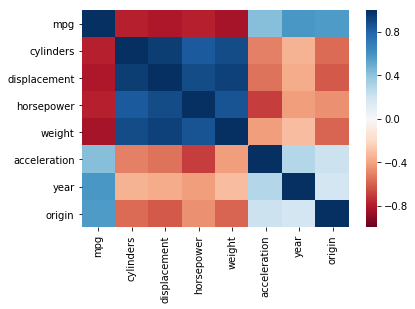

In [262]:
seaborn.heatmap(cars.corr(), vmin=-1, vmax=1, cmap='RdBu')

In [272]:
def span(data):
    """Calcuate teh differenc between the 99th and 1st percentile"""
    return data.quantile(0.99) - data.quantile(0.01)

In [274]:
cars.apply(span)

TypeError: ("can't multiply sequence by non-int of type 'float'", 'occurred at index name')

In [275]:
abalone = pd.read_csv('abalone.csv')

In [276]:
len(abalone)

4177

In [277]:
abalone.columns

Index(['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings'],
      dtype='object')

In [278]:
abalone.pivot_table(index ='sex')

diameter    height    length      rings  shell weight  shucked weight  \
sex                                                                          
F    0.454732  0.158011  0.579093  11.129304      0.302010        0.446188   
I    0.326494  0.107996  0.427746   7.890462      0.128182        0.191035   
M    0.439287  0.151381  0.561391  10.705497      0.281969        0.432946   

     viscera weight  whole weight  
sex                                
F          0.230689      1.046532  
I          0.092010      0.431363  
M          0.215545      0.991459

In [281]:
abalone.pivot_table(index='rings', values='shucked weight', aggfunc='max')

shucked weight
rings                
1              0.0010
2              0.0045
3              0.0310
4              0.0875
5              0.4950
6              0.6410
7              0.7070
8              0.8255
9              1.2530
10             1.1705
11             1.4880
12             1.3485
13             1.3510
14             1.2395
15             0.7510
16             0.8835
17             1.1465
18             0.8435
19             0.8665
20             0.7650
21             0.6370
22             0.7425
23             0.9330
24             0.6675
25             0.4265
26             0.3840
27             0.7535
29             0.7055

### Exercise: When do abalone have the most meat?

Calucuate a pivot table on the abaolone where:
- the row index is the number of ring
-coluns is the sex
- the values to aggregate are list of the "whole weight" and the "shuked weight"
- the aggfunc is 'median

How old is your abalone when it gets to the maximum weight? Use. plot() on the result to find out.


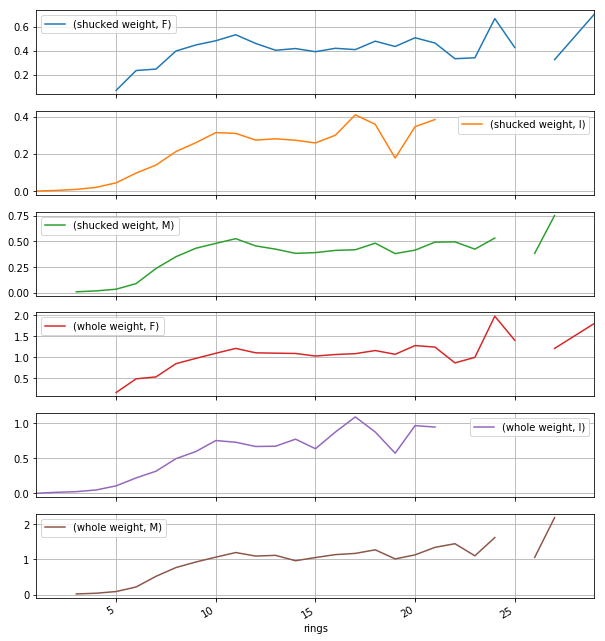

In [296]:
abalone.pivot_table(
    index='rings',
    columns ='sex',
    values=['whole weight','shucked weight'], 
    aggfunc='median').plot(subplots=True, figsize=(10,12), grid= True);

### Numpy 

Is the mathematical library. 

In [297]:
import numpy as np


In [298]:
np.array({1,2,3,4})

array({1, 2, 3, 4}, dtype=object)

In [300]:
abalone['shucked weight'].values

array([0.2245, 0.0995, 0.2565, ..., 0.5255, 0.531 , 0.9455])

In [306]:
numbers = np.array({1,2,3,4})

In [307]:
numbers.size

1

In [308]:
numbers.dtype

dtype('O')

In [309]:
numbers.ndim

0

In [310]:
numbers.shape

()

In [311]:
from PIL import Image

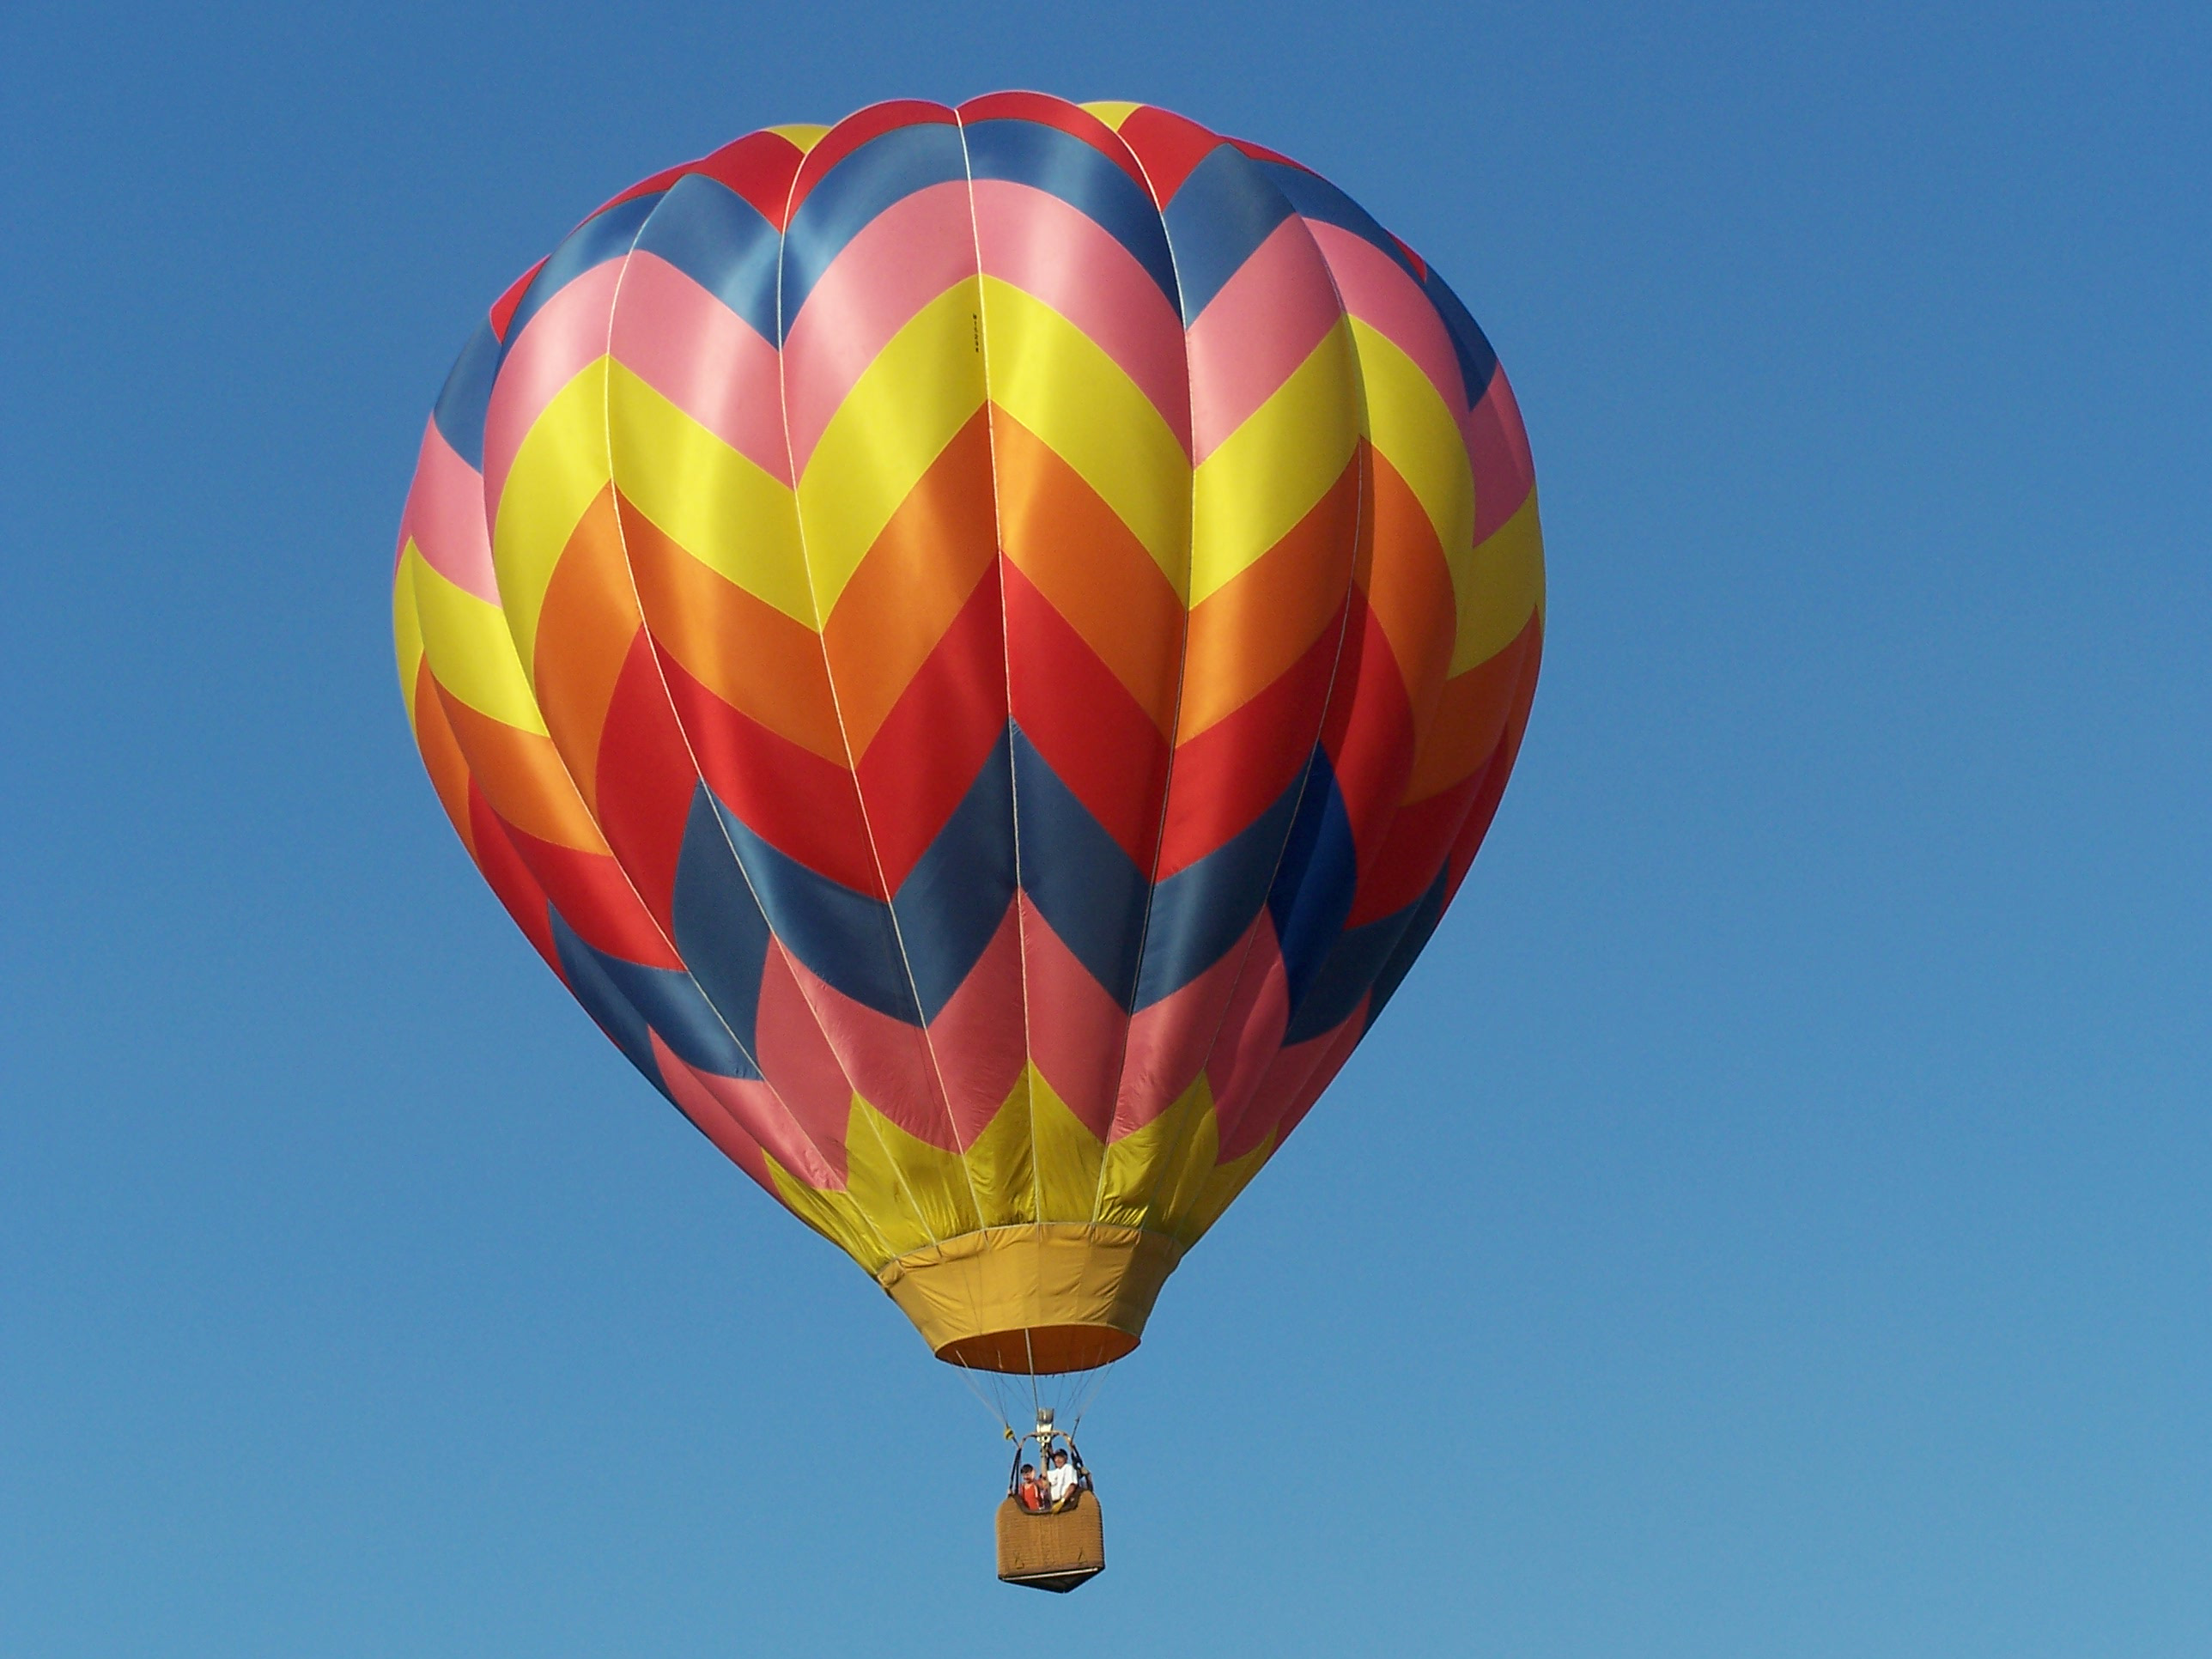

In [314]:
Image.open('hot-air-balloon1.jpg')

In [315]:
np.array(Image.open('hot-air-balloon1.jpg'))

array([[[ 60, 112, 170],
        [ 60, 112, 170],
        [ 60, 112, 170],
        ...,
        [ 67, 118, 175],
        [ 68, 119, 176],
        [ 68, 119, 176]],

       [[ 60, 112, 170],
        [ 60, 112, 170],
        [ 60, 112, 170],
        ...,
        [ 67, 118, 175],
        [ 68, 119, 176],
        [ 68, 119, 176]],

       [[ 60, 112, 170],
        [ 60, 112, 170],
        [ 60, 112, 170],
        ...,
        [ 66, 118, 175],
        [ 66, 118, 175],
        [ 66, 118, 175]],

       ...,

       [[ 89, 155, 190],
        [ 90, 156, 191],
        [ 91, 155, 191],
        ...,
        [102, 160, 198],
        [103, 161, 199],
        [103, 163, 200]],

       [[ 89, 154, 192],
        [ 89, 154, 192],
        [ 91, 155, 193],
        ...,
        [102, 160, 198],
        [102, 162, 199],
        [102, 162, 199]],

       [[ 89, 154, 192],
        [ 89, 154, 192],
        [ 91, 155, 193],
        ...,
        [100, 160, 197],
        [101, 161, 198],
        [102, 162, 199]]

In [316]:
balloon =np.array(Image.open('hot-air-balloon1.jpg'))

In [317]:
import matplotlib.pyplot as plt

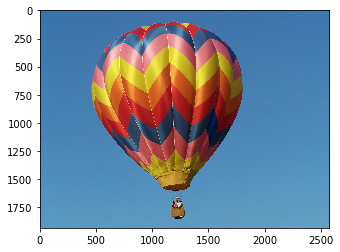

In [319]:
plt.imshow(balloon)

In [320]:
balloon.size

14930496

In [321]:
balloon.dtype

dtype('uint8')

In [322]:
balloon.ndim

3

In [323]:
balloon.shape #convention for an image is row,columns , colours

(1932, 2576, 3)

In [324]:
balloon

array([[[ 60, 112, 170],
        [ 60, 112, 170],
        [ 60, 112, 170],
        ...,
        [ 67, 118, 175],
        [ 68, 119, 176],
        [ 68, 119, 176]],

       [[ 60, 112, 170],
        [ 60, 112, 170],
        [ 60, 112, 170],
        ...,
        [ 67, 118, 175],
        [ 68, 119, 176],
        [ 68, 119, 176]],

       [[ 60, 112, 170],
        [ 60, 112, 170],
        [ 60, 112, 170],
        ...,
        [ 66, 118, 175],
        [ 66, 118, 175],
        [ 66, 118, 175]],

       ...,

       [[ 89, 155, 190],
        [ 90, 156, 191],
        [ 91, 155, 191],
        ...,
        [102, 160, 198],
        [103, 161, 199],
        [103, 163, 200]],

       [[ 89, 154, 192],
        [ 89, 154, 192],
        [ 91, 155, 193],
        ...,
        [102, 160, 198],
        [102, 162, 199],
        [102, 162, 199]],

       [[ 89, 154, 192],
        [ 89, 154, 192],
        [ 91, 155, 193],
        ...,
        [100, 160, 197],
        [101, 161, 198],
        [102, 162, 199]]

To Index in numpy we use postional indexing:

In [326]:
balloon[0][0][0] #don't index numpy this way!

60

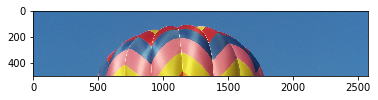

In [329]:
plt.imshow(balloon[0:500])

A slice lets you extract a range of values. Indexing a single value reduces the number of dimensions by 1.

In [330]:
balloon[0]

array([[ 60, 112, 170],
       [ 60, 112, 170],
       [ 60, 112, 170],
       ...,
       [ 67, 118, 175],
       [ 68, 119, 176],
       [ 68, 119, 176]], dtype=uint8)

In [331]:
balloon[0:500][0][0]

array([ 60, 112, 170], dtype=uint8)

To change dimesions you use a comma inside the square brackets instage of seperate bracket - big difference!

In [334]:
balloon[0:500,0,0]

array([60, 60, 60, 60, 60, 60, 60, 58, 58, 58, 56, 56, 56, 56, 57, 58, 52,
       54, 53, 54, 56, 59, 61, 63, 63, 64, 64, 63, 63, 63, 62, 62, 59, 59,
       58, 59, 57, 57, 60, 61, 61, 63, 66, 67, 65, 64, 62, 63, 59, 58, 56,
       56, 57, 58, 58, 58, 58, 58, 58, 58, 57, 57, 57, 57, 54, 56, 58, 60,
       60, 62, 63, 65, 63, 63, 63, 64, 64, 65, 65, 65, 60, 59, 59, 57, 55,
       54, 54, 52, 53, 56, 57, 58, 58, 60, 58, 58, 61, 61, 61, 61, 61, 62,
       62, 60, 62, 61, 59, 58, 58, 58, 60, 61, 59, 58, 58, 60, 62, 64, 63,
       61, 58, 57, 56, 56, 55, 56, 57, 57, 60, 61, 63, 63, 64, 63, 63, 64,
       64, 63, 63, 64, 62, 62, 62, 62, 63, 62, 61, 60, 59, 59, 60, 60, 59,
       60, 61, 62, 63, 63, 63, 63, 58, 58, 59, 62, 62, 62, 63, 66, 65, 63,
       63, 62, 60, 55, 56, 57, 57, 58, 59, 60, 60, 59, 59, 58, 60, 59, 58,
       57, 57, 58, 59, 60, 62, 60, 60, 62, 62, 60, 62, 64, 66, 65, 64, 64,
       64, 65, 65, 65, 60, 60, 60, 62, 62, 63, 63, 63, 61, 62, 63, 63, 63,
       60, 59, 58, 63, 60

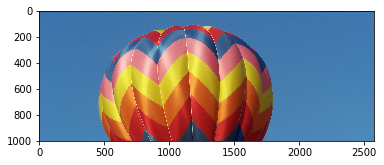

In [336]:
plt.imshow(
    balloon[:1000]
)

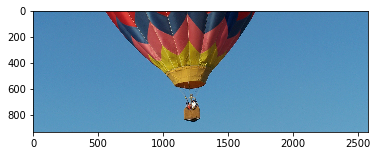

In [337]:
plt.imshow(
    balloon[1000:]
)

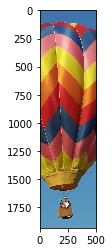

In [340]:
plt.imshow(
    balloon[:,1000:1500]
)

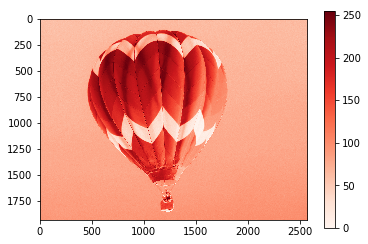

In [344]:
plt.imshow(
    balloon[:,:,0],
    cmap='Reds'
)
plt.colorbar()

### Exercise : Finding the ballon's basked

1. Use slicing in the first tow dimension to slice out the baske dunderneath the balloon plot

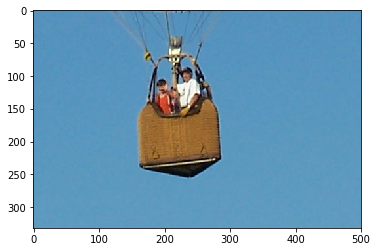

In [352]:
plt.imshow(
    balloon[1600:17000, 1000:1500]
)

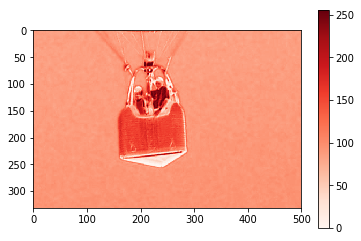

In [355]:
plt.imshow(
    balloon[1600:17000, 1000:1500,0],
    cmap='Reds'
)
plt.colorbar()

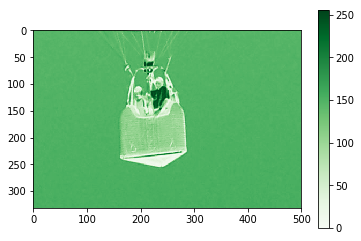

In [361]:
plt.imshow(
    balloon[1600:17000, 1000:1500,1],
    cmap='Greens'
)
plt.colorbar()

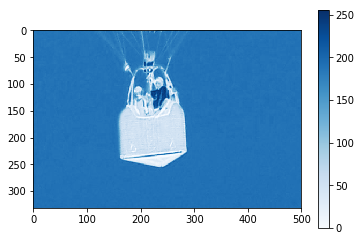

In [362]:
plt.imshow(
    balloon[1600:17000, 1000:1500,2],
    cmap='Blues'
)
plt.colorbar()

You can think of a ablack and white photos as a level of brightness. SO if you have intensity from red, breen and blue onw wy you could calcuate the total brightness is the use the mean

In [363]:
np.mean(balloon)

123.34402822250513

In [365]:
plt.imshow(np.mean(basket,axis=2), cmap='gray'))

SyntaxError: invalid syntax (<ipython-input-365-d415bff2ff3e>, line 1)

In [367]:
luminance = np.array([0.2126, 0.7152, 0.0722])

In [370]:
weightedColours = balloon * luminance

### Exercise: Getting the bettter balck and white images

use `np.sum` to calcuate the weighted sum of your colours, and plot the results. COmpare this with ttaking the mean of the balloon across axis 2. which gives the better image?

In [372]:
wbask =np.sum(weightedColours,axis=2)

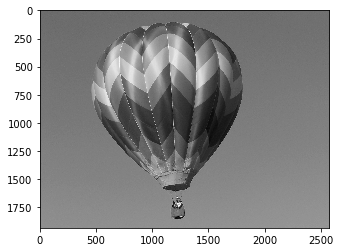

In [376]:
plt.imshow(np.sum(weightedColours,axis=2), cmap='gray')

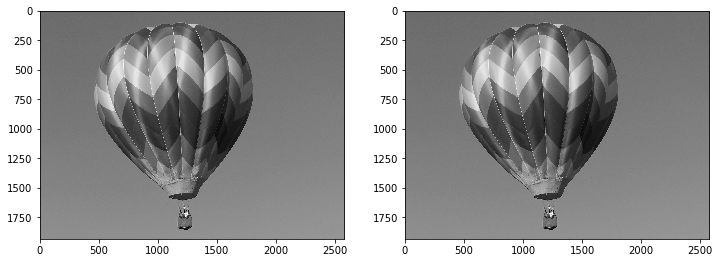

In [379]:
fig, plots = plt.subplots(ncols=2,figsize=(12,7))
plots[0].imshow(np.sum(weightedColours,axis=2), cmap='gray')
plots[1].imshow(np.mean(weightedColours,axis=2), cmap='gray')

### Plotting with seaborn 

seaborn is great beacahe it makes plots easer than matplot

In [381]:
import seaborn

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
1    18.0          8         307.0         130    3504          12.0    70   
2    15.0          8         350.0         165    3693          11.5    70   
3    18.0          8         318.0         150    3436          11.0    70   
4    16.0          8         304.0         150    3433          12.0    70   
5    17.0          8         302.0         140    3449          10.5    70   
6    15.0          8         429.0         198    4341          10.0    70   
7    14.0          8         454.0         220    4354           9.0    70   
8    14.0          8         440.0         215    4312           8.5    70   
9    14.0          8         455.0         225    4425          10.0    70   
10   15.0          8         390.0         190    3850           8.5    70   
11   15.0          8         383.0         170    3563          10.0    70   
12   14.0          8         340.0         160    3609           8.0    70   
13   15.0          8         400.0         150    3761           9.5    70   
14   14.0          8         455.0         225    3086          10.0    70   
15   24.0          4         113.0          95    2372          15.0    70   
16   22.0          6         198.0          95    2833          15.5    70   
17   18.0          6         199.0          97    2774          15.5    70   
18   21.0          6         200.0          85    2587          16.0    70   
19   27.0          4          97.0          88    2130          14.5    70   
20   26.0          4          97.0          46    1835          20.5    70   
21   25.0          4         110.0          87    2672          17.5    70   
22   24.0          4         107.0          90    2430          14.5    70   
23   25.0          4         104.0          95    2375          17.5    70   
24   26.0          4         121.0         113    2234          12.5    70   
25   21.0          6         199.0          90    2648          15.0    70   
26   10.0          8         360.0         215    4615          14.0    70   
27   10.0          8         307.0         200    4376          15.0    70   
28   11.0          8         318.0         210    4382          13.5    70   
29    9.0          8         304.0         193    4732          18.5    70   
30   27.0          4          97.0          88    2130          14.5    71   
..    ...        ...           ...         ...     ...           ...   ...   
368  28.0          4         112.0          88    2605          19.6    82   
369  27.0          4         112.0          88    2640          18.6    82   
370  34.0          4         112.0          88    2395          18.0    82   
371  31.0          4         112.0          85    2575          16.2    82   
372  29.0          4         135.0          84    2525          16.0    82   
373  27.0          4         151.0          90    2735          18.0    82   
374  24.0          4         140.0          92    2865          16.4    82   
375  36.0          4         105.0          74    1980          15.3    82   
376  37.0          4          91.0          68    2025          18.2    82   
377  31.0          4          91.0          68    1970          17.6    82   
378  38.0          4         105.0          63    2125          14.7    82   
379  36.0          4          98.0          70    2125          17.3    82   
380  36.0          4         120.0          88    2160          14.5    82   
381  36.0          4         107.0          75    2205          14.5    82   
382  34.0          4         108.0          70    2245          16.9    82   
383  38.0          4          91.0          67    1965          15.0    82   
384  32.0          4          91.0          67    1965          15.7    82   
385  38.0          4          91.0          67    1995          16.2    82   
386  25.0          6         181.0         110    2945          16.4    82   
387  38.0          6        

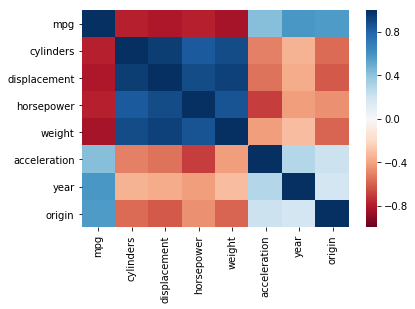

In [387]:
seaborn.heatmap(cars.corr(), cmap='RdBu', vmin=-1, vmax=1)

### Exercise: makcoluns in cars.

what if you want to see the shape of the relationship between columns in cars

1. Try unsing `seaborn.parplot(cars)` to crate pair plot. What does it show you?

2. Add the keyword argument hue='oring and try agagin what is the difference.ing a pairplot

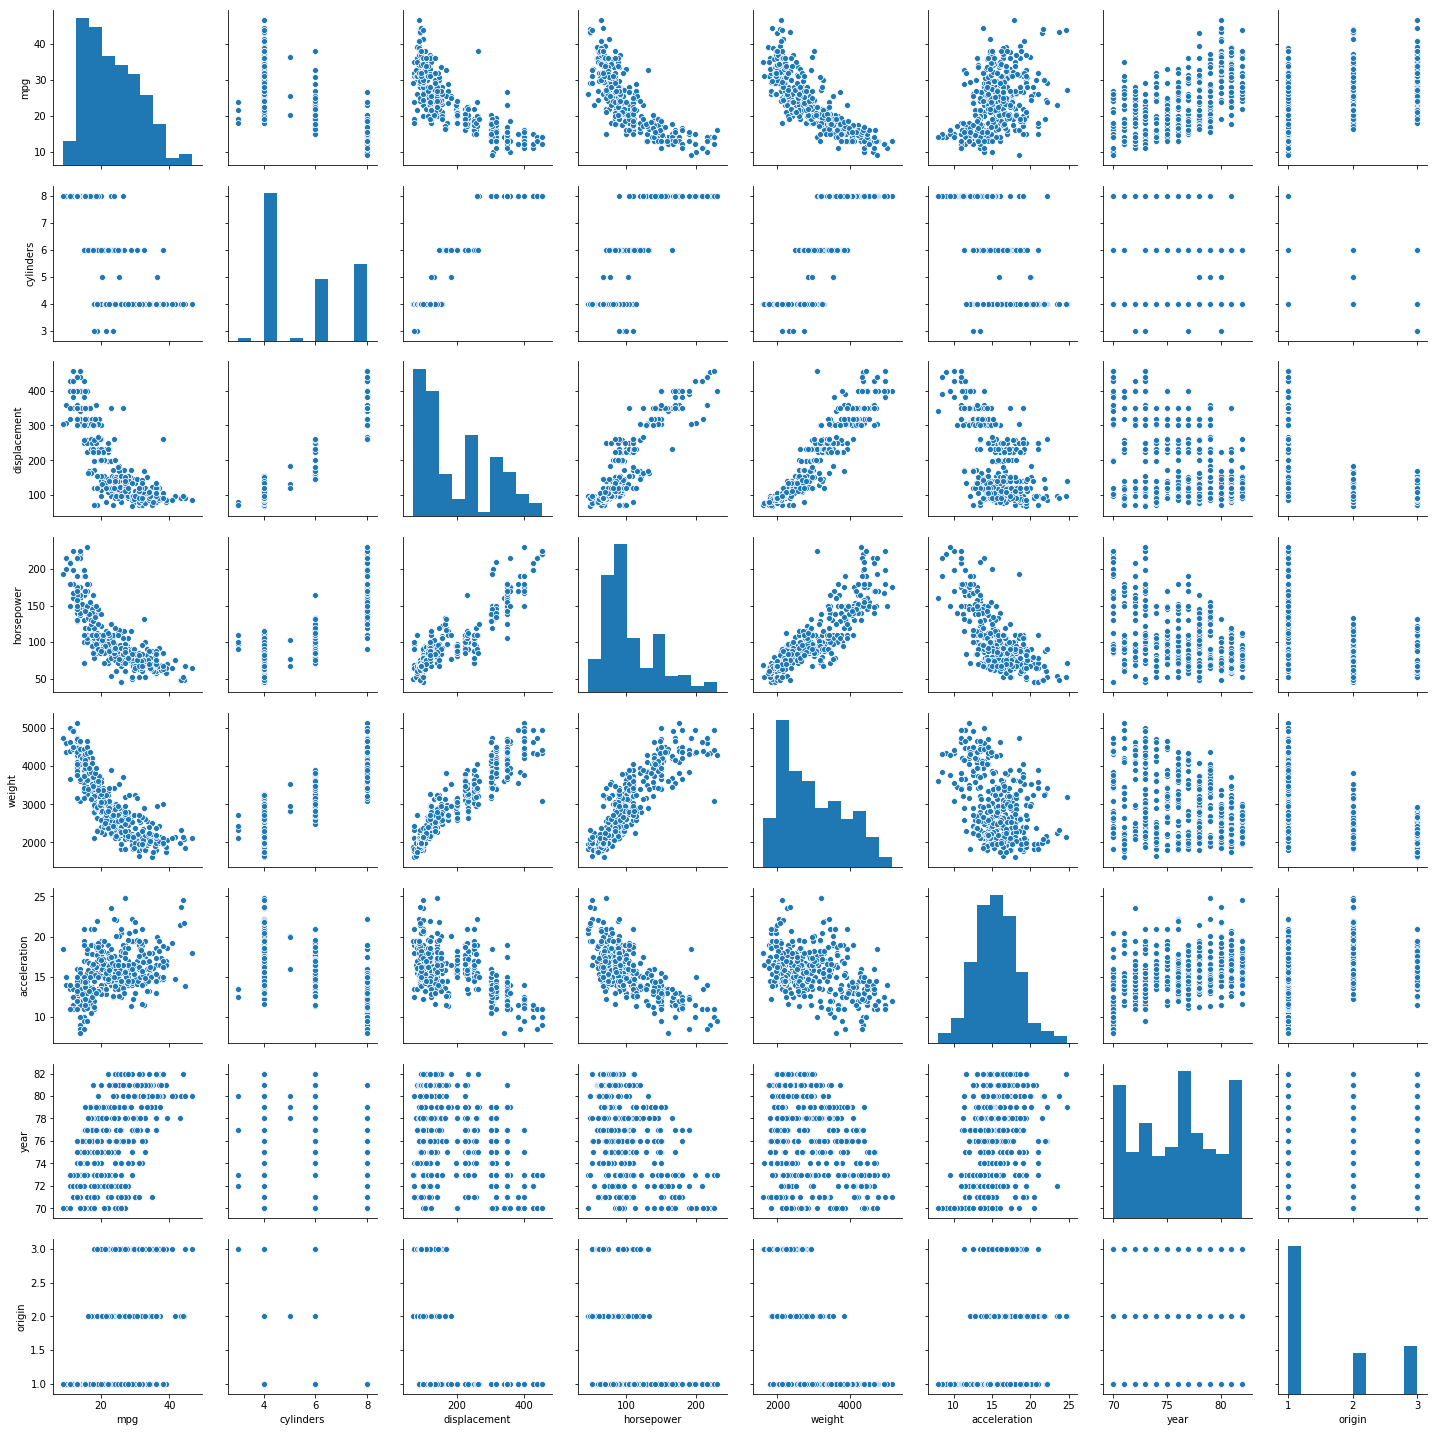

In [388]:
seaborn.pairplot(cars)

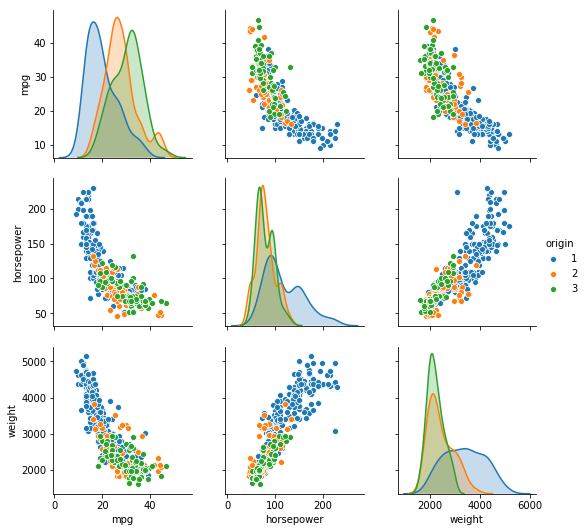

In [392]:
seaborn.pairplot(cars, hue='origin' ,vars= ['mpg','horsepower','weight'])

seabornt has lots of plots to compare x and y values. the way you call them is always the same

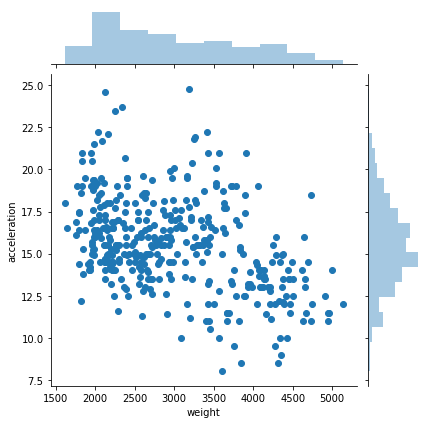

In [393]:
seaborn.jointplot(x='weight', y='acceleration', data= cars)

In [394]:
### Exericise the last three more plts

1. `seaborn.boxplot`
2. violin
3. swamplot

SyntaxError: invalid syntax (<ipython-input-394-fc85b480d209>, line 3)

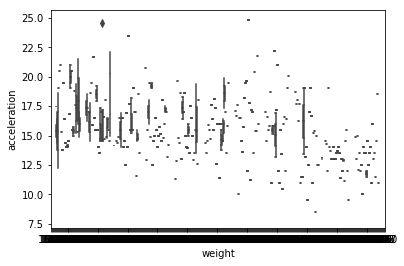

In [395]:
seaborn.boxplot(x='weight', y='acceleration', data= cars)

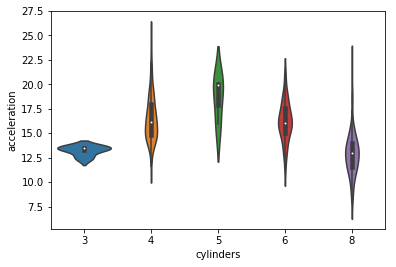

In [398]:
seaborn.violinplot(x='cylinders', y='acceleration', data= cars)

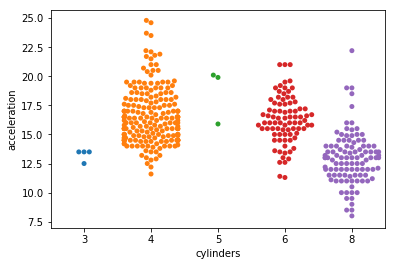

In [399]:
seaborn.swarmplot(x='cylinders', y='acceleration', data= cars)